# Modeling Systems of Linear Equations
CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

In [1]:
import numpy as np

## Introduction

I would bet you can think of at least five classes where you solved one or more algebraic equations as part of a **scientific or engineering calculation.** In this class, we will learn how to solve algebraic equations in Python for several fundamental chemical engineering problems.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: List out the <b>problem solving steps</b> you learned in CBE 20255 for mass and energy balance analysis of chemical processes.
</div>

We will now practice these problem solving steps.

## Environmental Controls for a Power Plant

In power plants, it is essential to remove pollutants such as SO$_x$ from the flue gas before it is vented to the atmosphere. This is commonly done with a **wet flue gas desulfuriziation** (WFGD) system in a coal power plant. The main idea is to react calcium carbonate, calcium hydroxide, or magnesium hydroxide with SO$_2$ to form calcium or magnesium sulfate. In fact, calcium sulfate is commonly known as [gypsum](https://en.wikipedia.org/wiki/Gypsum), which can be sold as an ingredient to make drywall. While SO$_x$ refers to many components, we will focus our analysis on just SO$_2$.

Here are the main chemical reactions:

CaCO$_{3\mathrm{(s)}}$ + SO$_{2\mathrm{(g)}}$ $\rightarrow$ CaSO$_{3{(s)}}$ + CO$_{2\mathrm{(g)}}$

or

Ca(OH)$_{2\mathrm{(s)}}$ + SO$_{2\mathrm{(g)}}$ $\rightarrow$ CaSO$_\mathrm{3(s)}$ + H$_{2}$O$_{\mathrm{(l)}}$

or 

Mg(OH)$_{2\mathrm{(s)}}$ + SO$_{2\mathrm{(g)}}$ $\rightarrow$ MgSO$_\mathrm{3(s)}$ + H$_{2}$O$_{\mathrm{(l)}}$

Below is an illustration of a wet FGD unit (adapted from Babcock and Wilcox Company, *Steam: Its Generation and Uses*, 2005):
1. **Feed.** Flue gas with SO$_x$ enters the FGD.
2. **Absorption Zone.** As flue gas moves upward through the unit, it comes in contact with a slurry.  SO$_x$ moves from the vapor phase (flue gas) to the liquid phase (slurry). Chemical engineers call this process absorption.
3. **Oxidation Zone.** The SO$_x$ reacts to form a solid product via the chemical reactions stated above. It is reasonable to assume these reactions go to completition and all of the SO$_x$ in the oxidation zone reacts.
4. **Pump.** The slurry mixture is pumped to the top of the absorber.
5. **Sprayer.** The slurry mixture is spray at the top of the absorber to ensure even distribution throughout the column.
6. **Effluent.** Cleaned flue gas leaves the absorber.

![WFGD](../../media/wet_fgd3.png)

The wet FGD is an excellent example for our class because it foreshadows then entire CBE undergraduate curriculum. For the next 5 semesters, you will develop the technical background to fully analyze a WFGD and similar systems:
* Thermodynamics (CBE 20260, 30367): Solubility of SO$_x$ in the water-slurry.
* Transport (CBE 30355, 30356): Rate of mass and energy transfer bewteen the vapor and liquid phases.
* Control (CBE 30338): Dynamic operation (i.e., NOT at steady-state)
* Reaction Engineering (CBE 40445): Oxidation reaction to create byproduct
* Separations (CBE 40443): Detailed equipment design including sizing
* Process Design (CBE 40448): Integration of a system (e.g., WFGD) into a larger process (e.g., power plant)

### Determine Additional Data and Analysis Goal

Let's use **your background from CBE 20255** (Introduction to Chemical Engineering) to analyze this system.

**Feed Specifications**

![inputs](../../media/wfgd-table.png)

*Table 1*: Flue gas flow rate and compositions before treatment for a 500 MW coal-fired power plant (Babcock and Wilcox Company, *Steam: Its Generation and Uses*, 2005).

For reference, the Notre Dame power plant has a maximum electricity output capacity of 28.6 MW. It also co-generates steam and chilled water, so direct comparison is difficult. It is about 20 times smaller. Notre Dame will also phase out coal in the power plant by 2020.

**Equilibrium Information**

For a first approximation, we can assume:
1. Virtually no air dissolves in the slurry
2. Virtually no water evaporates from the slurry into the flue gas

This means we only need to worry about the solubility of the SO$_x$ that dissolves into the slurry. As another assumption, we will model the slurry as water. In CBE 20255, you may have learned about Henry's Law, a simple correlation for solubility.

![henrys](../../media/henrys_law2.png)
*Figure 2*: Henry's law for SO$_2$ solubility in water (C. J. Geankoplis, *Transport Processes and Separation Process Principles: Includes Unit Operations*, 2003).

**Design/Analysis Goal**

We want to **compute** the required flow rate of water to achieve 98% removal of SO$_2$ for a large (500 MW) power plant.

### Draw a Picture

Next, let's draw a picture of the system.

![single_FGD](../../media/single_stage_model.png)

In this simplified picture, the vapor stream (flue gas) enters at the bottom right and the liquid stream (slurry) enters at the top left. We assume only SO$_2$ moves from the vapor to the liquid. In this picture, $L$ and $V$ are total stream flowrates. $x$ and $y$ are the mole fraction of $SO_2$.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Copy this picture onto paper. Then identify the quantities we already know from the previous information.
</div>

### State Assumptions



With enough assumptions, we can perform quick "back of the envelope" design calculations for the SO$_2$ absorber using mostly skills you learned in CBE 20255.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Make a list of at least three assumptions we need to compute the required liquid flowrate to achieve 98% SO$_2$ removal. Bring this list to class.
</div>

### 5b-iv. Mathematical Model

With these assumptions, we can propose a mathematical model for the absorber:

Equation A: $V_{in} + L_{in} = V_{out} + L_{out}$

Equation B: $y_{out} = K x_{out}$

Equation C: $V_{in} y_{in} + L_{in} x_{in} = V_{out} y_{out} + L_{out} x_{out}$

Equation D: $y_{out} = (1 - 0.98) y_{in}$

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Identify the name for each equation from the list of choices below. Record your answer in the dictionary <tt>eqn_names</tt>. Use 'A', 'B', 'C', and 'D' as the keys and 1, 2, 3, 4, 5, 6, 7, or 8 as the values.
</div>

Choices for equation names:
1. Overall mass (mole) balance
2. SO$_2$ component mass (mole) balance
3. Water component mass (mole) balance
4. Air component mass (mole) balance
5. Energy balance
6. Entropy balance
7. Design goal: 98% SO$_2$ removal
8. SO$_2$ equilibrium (Henry's Law)

In [2]:
eqn_names = {'A': 0, 'B':0, 'C':0, 'D':0}
### BEGIN SOLUTION
eqn_names = {'A': 1, 'B':8, 'C':2, 'D':7}
### END SOLUTION

In [3]:
### BEGIN HIDDEN TESTS
eqn_names_ans = {'A': 1, 'B':8, 'C':2, 'D':7}

for i in ['A', 'B', 'C', 'D']:
    assert eqn_names[i] == eqn_names_ans[i], "Check your answer for equation "+i
### END HIDDEN TESTS

### Degree of Freedom Analysis

The next step after writing a model is to perform degree of freedom analysis.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Perform degree of freedom analysis. On paper, identify the number of unknowns (variables) and the number of equations. Then determine the number of additional specifications or equations needed to complete the design calculations.
</div>

### Revised Model

Let's make two additional assumptions:
1. The slurry entering the top of the absorber contains no water, i.e., $x_{in} = 0$
2. The flowrate of liquid in the absorber is approximately constant, i.e., $L_{in} = L_{out}$ 

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Provide a physical justification for $L_{in} = L_{out}$. Why is this a reasonable assumption? Write a few sentences.
</div>

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Does $L_{in} = L_{out}$ imply $V_{in} = V_{out}$? Explain in a few sentences.
</div>

### Calculations

We now have a mathematical model with zero degrees of freedom. But before we use Python, let's first manipulate the model on paper.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> <b>Home Activity</b>: Using the mathematical model and algebra, derive the following formula for the liquid flowrate $L$. 
</div>

$$L = V \frac{y_{in} - y_{out}}{y_{out} / K - x_{in}}$$

We can now use Python as a calculator to compute $L$. First, we will copy the given data.

In [4]:
### Step 1. Define Given Data

# Feed flowrate of SO2 in [lb / hr]
m_SO2 = 34900

# Feed flowrate of air in [lb / hr]
m_air = 5245600

# Molecular weights
mw_SO2 = 64.066
mw_air = 28.97
mw_water = 18.01528

# Removal efficieny (design goal)
eff = 0.98

# Equilibrium coefficient [mol frac SO2 in vapor / mol frac SO2 in liquid ]
# Taken from plot with Henry's law fit
K = 29.6

# Composition of SO2 in liquid feed in [mol frac]
xin = 0.0

How important is it to include SO$_2$ when computing $V$?

In [5]:
### Step 2. Convert to molar basis
# Vapor flowrate in [lb-mol / hr]
# How much does neglecting SO2 in feed change the final answer?
V = m_air / mw_air + m_SO2 / mw_SO2;
Valt = m_air / mw_air

print("Flowrate if SO2 is considered",V," lb-mol / hr")
print("Flowrate if SO2 is neglected",Valt," lb-mol/hr")
print("Relative difference: ",(V-Valt)/V*100,"%")

Flowrate if SO2 is considered 181614.8232145955  lb-mol / hr
Flowrate if SO2 is neglected 181070.0724887815  lb-mol/hr
Relative difference:  0.29994838316161015 %


Not very important! We can live with a 0.3% error.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> <b>Home Activity</b>: Compute the mole fraction of SO$_2$ in the vapor inlet. Store your answer in <tt>yin</tt>
</div>

In [6]:
# SO2 in flue gas feed
### BEGIN SOLUTION
yin = (m_SO2 / mw_SO2) / V
### END SOLUTION
print("yin = ",yin*100,"mol %")

yin =  0.2999483831616149 mol %


In [7]:
### BEGIN HIDDEN TESTS
yin_ans = 0.003

assert np.abs(yin - yin_ans) < 1E-2, "Check your calculation for yin"
### END HIDDEN TESTS

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> <b>Home Activity</b>: Compute the mole fraction of SO$_2$ in the vapor outlet if the unit achieves with 98% SO$_2$ removal. Store your answer in <tt>yout</tt>.
</div>

In [8]:
### Step 3. Compute vapor outlet composition
# SO2 in vapor outlet in [mol frac]

### BEGIN SOLUTION
yout = (1-eff) * yin
### END SOLUTION

print("yout = ",yout*100,"mol %")

yout =  0.005998967663232302 mol %


In [9]:
### BEGIN HIDDEN TESTS
yout_ans = 0.006 / 100

assert np.abs(yout - yout_ans) < 1E-2, "Check your calculation for yout"
### END HIDDEN TESTS

Finally, we can apply the formula we derived. We will calculate from lb-mol/hr to lb/hr, because, who really has intuition in lb-mol/hr?

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> <b>Home Activity</b>: Compute the liquid flowrate. Store your answer in <tt>L</tt> with units lb-mol/hr and <tt>L_lb</tt> with units lb/hr.
</div>

In [10]:
### Step 4. Apply formulas we derived with direct substitution
# Liquid outlet composition in [mol frac]
xout = yout / K
print("xout = ",xout*100,"mol %")

# Liquid flowrate in lb-mol/hr
### BEGIN SOLUTION
L = V*(yin - yout)/(xout - xin)
### END SOLUTION
print("L = ",L,"lb-mol/hr")

# Liquid flowrate in lb/hr
### BEGIN SOLUTION
L_lb = L * mw_water
### END SOLUTION
print("L = ",L_lb/1E6,"millon lb/hr of water")

xout =  0.00020266782646055073 mol %
L =  263414139.5904491 lb-mol/hr
L =  4745.479480681025 millon lb/hr of water


In [11]:
### BEGIN HIDDEN TESTS
L_ans = 263414140.0
L_lb_ans = 4745.0E6

assert np.abs(L_ans - L)/L_ans < 0.02, "Check your calculation for L"

assert np.abs(L_lb - L_lb_ans)/L_lb_ans < 0.02, "Check your unit conversions."

### END HIDDEN TESTS

I, for one, do not have a good intuition for the size of 1 millions pounds of water. Let's convert into Olympic swimming pools!

In [12]:
### Step 5. Convert and interpret

# How much water does an Olympic swimming pool hold (in [lb])?
swimming_pool = 5.5E6;

# Convert to swimming pools
L_pool = L_lb / swimming_pool
print("L = ",L_pool,"Olympic swimming pools per hour")

L =  862.8144510329138 Olympic swimming pools per hour


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Compare your home activity results with a partner. Create a list of questions to discuss as a class.
</div>

### Final Result and Discussion

This is the final step of our analysis: interpret the results.

Based on these calculates, we approximate a naive WFGD system would require 870 Olympic swimming pools per hour of fresh water to treat the flue gas in the 500 MW power plant.


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: As a class, complete the following: (i) This result is reasonable/unreasonable because... (ii) To refine these calculations, we could...
</div>

## FGD Revisited with Linear Algebra

Earlier in this notebook we practiced modeling and problem solving steps from CBE 20255. We performed direct substitution on paper and used Python as a simple calculator. Is there an alternate way to attack this problem? You bet!

### Rewrite Model as a Linear System

If we write the model in matrix form, we can use tools from linear algebra to solve the equations simultaneously.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Rewrite the mathematical model as a linear system of equations.
</div>

### Solve Linear System with Python

Now let's see how to solve a linear system of equations in Python. Notice, we need to choose a value of $L$.

In [20]:
# Assemble linear system
A = np.array([[L, V],[K, -1]])
print("A = \n",A)

b = np.array([L*xin + V*yin, 0])
print("\nb = \n",b)

# Solve linear system
z = np.linalg.solve(A,b)

print("\nz = \n",z)

A = 
 [[ 1.00000000e+10  1.81614823e+05]
 [ 2.96000000e+01 -1.00000000e+00]]

b = 
 [544.75072581   0.        ]

z = 
 [5.44458036e-08 1.61159579e-06]


### Perform Sensitivity Analysis to Determine L

How can we use our model to calculate $L$ for the design goal? We can perform sensitivity analysis and plot our results. Consider the following steps:
* Loop over a range of L values. For each value of L:
 * Solve the linear system
 * Record yout
* Plot L vs yout on a semilog plot.
* Add the design target for yout to the plot.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Write pseudocode to perform the following steps.
</div>

In [14]:
# Create values of L to try that are log spaced
print(np.logspace(6,10,10))

[1.00000000e+06 2.78255940e+06 7.74263683e+06 2.15443469e+07
 5.99484250e+07 1.66810054e+08 4.64158883e+08 1.29154967e+09
 3.59381366e+09 1.00000000e+10]


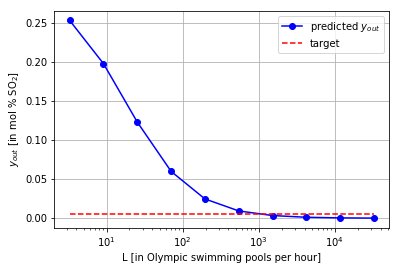

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# define values from 1E6 to 1E10 to try for L
Ltry = np.logspace(6,10,10)

# allocate array to store results
yout_store = np.zeros(len(Ltry))

count = 0
# Loop through values in Ltry
### BEGIN SOLUTION
for L in Ltry:
### END SOLUION
    # Assemble linear system
    ### BEGIN SOLUTION
    A = np.array([[L, V],[K, -1]])
    b = np.array([L*xin + V*yin, 0])
    ### END SOLUTION
    
    # Solve linear system
    ### BEGIN SOLUTION
    z = np.linalg.solve(A,b)
    ### END SOLUTION
    
    # Store value
    ### BEGIN SOLUTION
    yout_store[count] = z[1]
    ### END SOLUTION
    
    # increment counter
    ### BEGIN SOLUTION
    count += 1
    ### END SOLUTION

# convert L to swimming pool units
Ltry2 = Ltry * mw_water / swimming_pool

# create plot
### BEGIN SOLUTION
plt.semilogx(Ltry2, yout_store*100,label="predicted $y_{out}$",marker="o",color="blue")
plt.semilogx(Ltry2, yout*np.ones(len(Ltry))*100,label="target",linestyle="--",color="red")
plt.legend()
plt.xlabel("L [in Olympic swimming pools per hour]")
plt.ylabel("$y_{out}$ [in mol % SO$_2$]")
plt.grid(True)
plt.show()
### END SOLUTION